# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Primeiro caso de teste

In [2]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [3]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)

In [4]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)


In [5]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)


In [6]:
#ordenação
pop_ord = pop[(pop[0:, -1]).argsort()]


In [7]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]


In [8]:
#contagem de população estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [28]:
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[(nova_melhor_pop[0:, -1]).argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i+1)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media + desvioP
desvioInf = media - desvioP
tabela

,0,0,0,0,0
0,16.593839,5.955797,8.114794,1.772335,3.737454
1,4.458156,5.955797,5.402148,1.772335,3.737454
2,0.800529,4.269151,5.402148,1.772335,3.737454
3,0.800529,4.269151,5.402148,1.772335,3.737454
4,0.800529,4.269151,2.091480,1.772335,3.737454
...,...,...,...,...,...
95,0.800529,1.176816,0.976272,0.565492,0.766240
96,0.800529,1.176816,0.976272,0.565492,0.766240
97,0.800529,1.176816,0.976272,0.565492,0.766240
98,0.800529,1.176816,0.976272,0.565492,0.766240


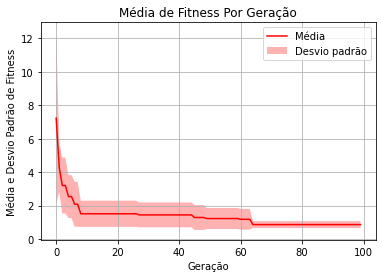


Número de iterações para a última convergência:  100


In [29]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media, color = "red", label = "Média")
plt.fill_between(range(len(media)), desvioSup, desvioInf, facecolor='red', alpha=0.3, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)

## Segundo caso de teste

In [11]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [12]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [13]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [14]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]


In [15]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T


In [16]:
#ordenar
palavra_ord = palavra[(palavra[0:, -1]).argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]


In [17]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [18]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP2 = np.std(tabela2,axis=1)
media2 = np.mean(tabela2,axis=1)
desvioInf2 = media2 - desvioP2
desvioSup2 = media2 + desvioP2

tabela2

,0,0,0,0,0
0,2.217603,0.701915,0.221129,0.109426,0.877397
1,0.106617,0.701915,0.221129,0.081017,0.877397
2,0.106617,0.701915,0.019339,0.081017,0.877397
3,0.106617,0.701915,0.019339,0.081017,0.877397
4,0.106617,0.701915,0.019339,0.081017,0.877397
...,...,...,...,...,...
95,0.000001,0.000102,0.000422,0.001291,0.001744
96,0.000001,0.000102,0.000422,0.001291,0.001744
97,0.000001,0.000102,0.000422,0.001291,0.001744
98,0.000001,0.000102,0.000422,0.001291,0.001744


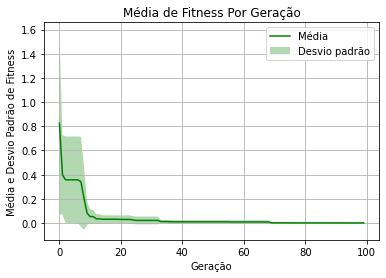


Número de iterações para a última convergência:  100


In [19]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media2, color = "green", label = "Média")
plt.fill_between(range(len(media2)), desvioSup2, desvioInf2, facecolor='green', alpha=0.3, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>

## Terceiro caso de teste

In [20]:
#gerar pop
tamanho_3 = 10
dim_3 = 2
#função rastrigin
def rastrigin(x):
    fit=[]
    for i in range(len(x)):
        fit.append(10 * dim_3 + (x[i]**2 - (10 * math.cos(2 * math.pi * x[i]))))
    return fit

#############
#função rastrigin
def fitnessFunc(self, indDecod ):
    fitness = 10*len(indDecod )
    for i in range(len(indDecod )):
        fitness += indDecod[i]**2 - (10*math.cos(2*math.pi*indDecod[i]))
    return fitness
#############

def converter3(pop):
    lb = -5.12
    ub = 5.12
    novaPop = []
    for i in pop:
        novaPop.append(lb + (ub - lb) * i)
    return np.array(novaPop)


In [21]:
pop_3 = criaPop(tamanho_3,dim_3)
pop_3 = pop_3.T

In [22]:
#converte pop
pop3 = converter3(pop_3)

#fitness
for i in pop3:
    p=rastrigin(i)
p=np.array(p)


In [23]:
#pop add fitness
pop_3 = pop_3.T
pop_3 = np.append(pop_3,p.reshape(-1,1),axis=1)


In [24]:
pop3 = pop_3[abs(pop_3[0:,-1]).argsort()] #ordenação
melhor_pop3_inicial= pop3[0:int(tamanho_3/2),:] #poda


In [25]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [26]:
tabela3 = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop3_inicial.copy()

            #novos 50% da população
            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            #converter para as faixas
            nova_pop = converter3(nova_pop)

            #fitness da nova população
            for i in nova_pop:
                fit=rastrigin(i)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            #reordena
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_3/2),:]

            #novos 50% da população
            nova_pop = np.array(criaPop(int(tamanho_3/2),dim_3)).T
            
            #converter para as faixas
            nova_pop = converter3(nova_pop)

            #fitness da nova população
            for k in nova_pop:
                fit=rastrigin(k)
            fit=np.array(fit)
            
            nova_pop=nova_pop.T
            nova_pop=np.c_[nova_pop,fit.T]
            
            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)
            
            #reordena
            melhor_pop = nova_melhor_pop[abs(nova_melhor_pop[0:, -1]).argsort()]
            
            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])
            
            if evolucao <= delta:
                cont += 1

            elif evolucao > delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela3 = pd.concat([tabela3, pd.DataFrame(melhor_i)], axis=1)

#media e desvio padrao dos fits
desvioP3 = np.std(tabela3,axis=1)
media3 = np.mean(tabela3,axis=1)
desvioInf3 = media3 - desvioP3
desvioSup3 = media3 + desvioP3

tabela3

,0,0,0,0,0
0,12.311476,13.039036,10.051738,13.039036,13.039036
1,12.311476,10.005927,10.051738,13.039036,13.039036
2,12.311476,10.005927,10.051738,11.241812,11.186541
3,12.311476,10.005927,10.051738,11.241812,11.186541
4,12.311476,10.005927,10.018150,11.241812,10.025074
...,...,...,...,...,...
95,10.001707,10.000007,10.001220,10.001220,10.025074
96,10.001707,10.000007,10.001220,10.001220,10.025074
97,10.001707,10.000007,10.001220,10.001220,10.025074
98,10.001707,10.000007,10.001220,10.001220,10.025074


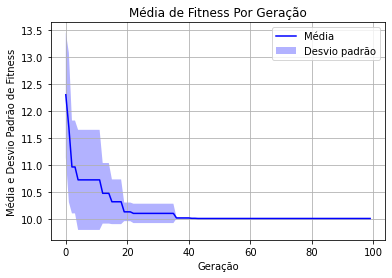


Número de iterações para a última convergência:  100


In [27]:
plt.title("Média de Fitness Por Geração")
plt.xlabel("Geração")
plt.ylabel("Média e Desvio Padrão de Fitness")
plt.plot(media3, color = "blue", label = "Média")
plt.fill_between(range(len(media3)), desvioSup3, desvioInf3, facecolor='blue', alpha=0.3, label ='Desvio padrão')
plt.grid(True)
plt.legend()
plt.show()
print('\nNúmero de iterações para a última convergência: ',i+1)

[Início](#Índice)<br>